In [1]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import plot, show, grid, xlabel, ylabel

In [111]:
def brownian(x0, n, out=None):
    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    mu, sigma = 0, 1
    r = np.random.normal(loc=mu, scale=sigma, size=x0.shape + (n,))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of the random samples
    # axis=-1 means last dimension, out=output array
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

[[ 6.90273031e-310  4.64024529e-310  4.64024529e-310 ...  8.48798317e-314
   8.48798317e-314  4.94065646e-324]
 [ 4.64016820e-310  6.90273046e-310  3.75246556e+231 ...  6.09743821e-052
   6.90267149e-310  6.90268927e-310]
 [ 8.06358401e-313  6.90273051e-310  4.64024529e-310 ...  5.03424719e-070
   2.76940422e+189 -1.12161986e+053]
 [-7.46039501e+055 -4.69186195e+083 -9.93961779e+175 ...  6.83363454e-059
  -1.02124589e-018 -4.26798652e+249]
 [-1.70315566e-154 -1.56200019e-277  3.28614479e+169 ... -1.72008844e+265
  -8.12153893e+085 -4.62052555e-163]]
[[ 6.90273031e-310  4.64024529e-310  4.64024529e-310 ...  8.48798317e-314
   8.48798317e-314  4.94065646e-324]
 [ 4.64016820e-310  6.90273046e-310  3.75246556e+231 ...  6.09743821e-052
   6.90267149e-310  6.90268927e-310]
 [ 8.06358401e-313  6.90273051e-310  4.64024529e-310 ...  5.03424719e-070
   2.76940422e+189 -1.12161986e+053]
 [-7.46039501e+055 -4.69186195e+083 -9.93961779e+175 ...  6.83363454e-059
  -1.02124589e-018 -4.26798652e+249]


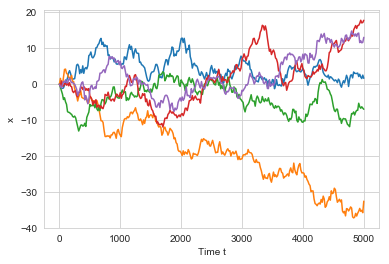

In [112]:
if __name__ == "__main__":
    # Total time: x axis
    T = 5000
    # Number of steps. (data)
    N = 300
    # Number of realizations to generate.
    m = 5
    # Time step size
    dt = T/N
    t = np.linspace(0.0, N*dt, N+1)
    
    # Create an empty array to store the realizations
    # x[m, N]
    x = np.empty((m, N+1))
    
    # Initial values of x
    x[:, 0] = 0    
    
    # Calc
    a = brownian(x[:,0], N, out=x[:,1:])

    
    # Plot
    sns.set_style('whitegrid')
    for k in range(m):
        sns.lineplot(x=t, y=x[k])
    plt.xlabel("Time t")
    plt.ylabel("x")
    plt.savefig("sample.png",format = 'png', dpi=300)